## Importing all the files.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests
import warnings
import plotly.graph_objects as go
import plotly.express as px

In [2]:
from mlxtend.plotting import plot_decision_regions # for showing all the decision boundary in models.

In [3]:
data = pd.DataFrame()

In [4]:
data['X1'] = [1,2,3,4,5,6,6,7,9,9]
data['X2'] = [5,3,6,8,1,9,5,8,9,2]
data['label'] = [1,1,0,1,0,1,0,1,0,0]

In [5]:
data.head() ## this is my data I will do apply adaboost here.

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0


<Axes: xlabel='X1', ylabel='X2'>

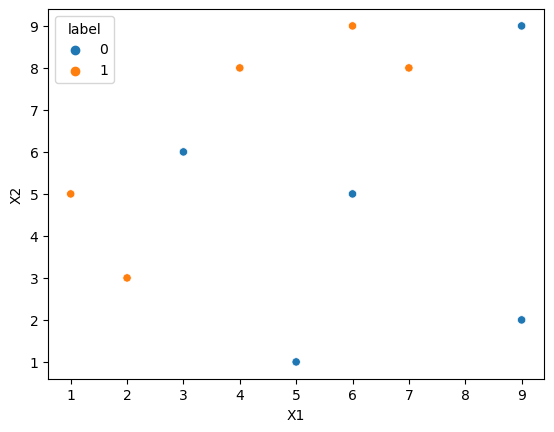

In [6]:
sns.scatterplot(x=data['X1'],y=data['X2'],hue=data['label'])

In [7]:
## Now assign the weight in datasets
data['weight']= 1/data.shape[0]
data
## weight should be equal.

,X1,X2,label,weight
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [9]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(max_depth=1) ## this is a condition for adaboosting {decision stumps}
X = data.iloc[:,0:2].values
y = data.iloc[:,2].values

## we will fit and plot the tree

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

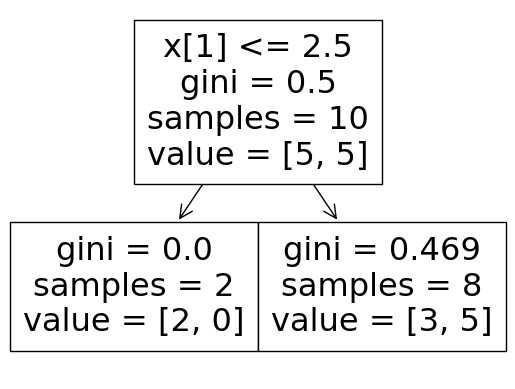

In [10]:
dt1.fit(X,y)
from sklearn.tree import plot_tree
plot_tree(dt1)
# ploting tree like this

in this way we have to split one time 

<Axes: >

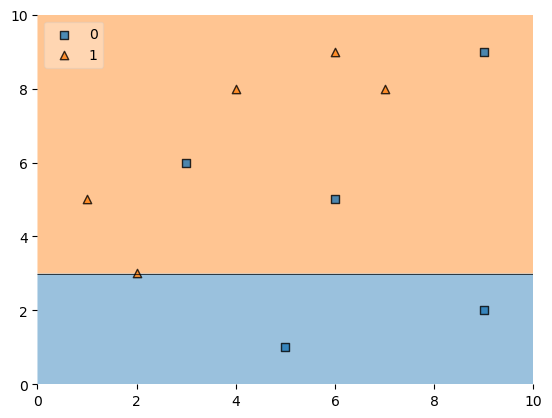

In [11]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In the above diagram clearly there are 3 mis classified points so we have to update the weights

## Predicting

In [12]:
data['y_pred'] = dt1.predict(X)

In [13]:
data

,X1,X2,label,weight,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


## making the function for error

In [14]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/error)

## so calculating alpha values

In [15]:
alpha1 = calculate_model_weight(0.3)
alpha1
# we have 3 mis-classified points so 0.1*3 =0.3.

0.42364893019360184

In [19]:
def update_row_weights(row,alpha=0.42364893019360184):
    if row['label'] == row['y_pred']:
        return row['weight'] * np.exp(-alpha)
    else:
        return row['weight'] * np.exp(alpha)

In [20]:
data['updated_weights'] = data.apply(update_row_weights,axis=1)

In [21]:
data

,X1,X2,label,weight,y_pred,updated_weights
0,1,5,1,0.1,1,0.065465
1,2,3,1,0.1,1,0.065465
2,3,6,0,0.1,1,0.152753
3,4,8,1,0.1,1,0.065465
4,5,1,0,0.1,0,0.065465
5,6,9,1,0.1,1,0.065465
6,6,5,0,0.1,1,0.152753
7,7,8,1,0.1,1,0.065465
8,9,9,0,0.1,1,0.152753
9,9,2,0,0.1,0,0.065465


In [24]:
data['updated_weights'].sum()
#we have to sum and normalised it
data['nomalized_weights'] = data['updated_weights']/data['updated_weights'].sum()

In [25]:
data

,X1,X2,label,weight,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065465,0.071429
1,2,3,1,0.1,1,0.065465,0.071429
2,3,6,0,0.1,1,0.152753,0.166667
3,4,8,1,0.1,1,0.065465,0.071429
4,5,1,0,0.1,0,0.065465,0.071429
5,6,9,1,0.1,1,0.065465,0.071429
6,6,5,0,0.1,1,0.152753,0.166667
7,7,8,1,0.1,1,0.065465,0.071429
8,9,9,0,0.1,1,0.152753,0.166667
9,9,2,0,0.1,0,0.065465,0.071429


In [27]:
data['nomalized_weights'].sum()

0.9999999999999999

In [29]:
data['cumsum_upper'] = np.cumsum(data['nomalized_weights'])
data['cumsum_lower'] = data['cumsum_upper'] - data['nomalized_weights']
data[['X1','X2','label','weight','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weight,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065465,0.000000,0.071429
1,2,3,1,0.1,1,0.065465,0.071429,0.142857
2,3,6,0,0.1,1,0.152753,0.142857,0.309524
3,4,8,1,0.1,1,0.065465,0.309524,0.380952
4,5,1,0,0.1,0,0.065465,0.380952,0.452381
5,6,9,1,0.1,1,0.065465,0.452381,0.523810
6,6,5,0,0.1,1,0.152753,0.523810,0.690476
7,7,8,1,0.1,1,0.065465,0.690476,0.761905
8,9,9,0,0.1,1,0.152753,0.761905,0.928571
9,9,2,0,0.1,0,0.065465,0.928571,1.000000


In [30]:
## Created the range for it.

In [31]:
#for creating the new data sets.

In [42]:
def create_new_dataset(df):
    indices = []

    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

In [44]:

index_values = create_new_dataset(data)

index_values

[2, 7, 6, 2, 1, 2, 6, 6, 2, 4]

In [45]:
second_data = data.iloc[index_values,[0,1,2,3]]
second_data

,X1,X2,label,weight
2,3,6,0,0.1
7,7,8,1,0.1
6,6,5,0,0.1
2,3,6,0,0.1
1,2,3,1,0.1
2,3,6,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
2,3,6,0,0.1
4,5,1,0,0.1


## Now creating another decision tree

In [47]:
dt2 = DecisionTreeClassifier(max_depth=1)
X = second_data.iloc[:,0:2].values
y = second_data.iloc[:,2].values
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.25, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]')]

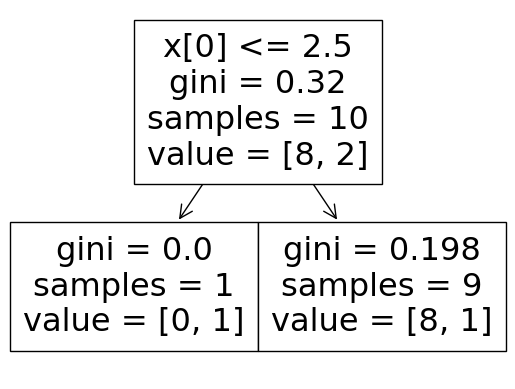

In [48]:
plot_tree(dt2)

<Axes: >

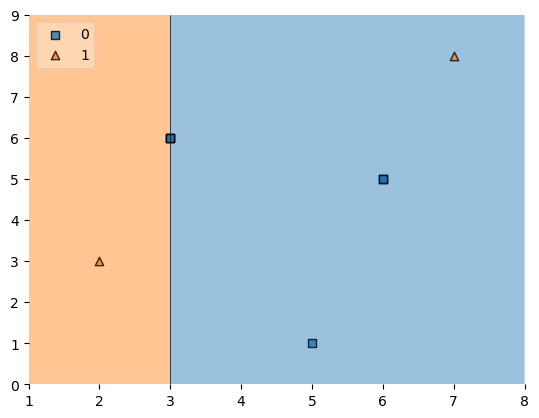

In [49]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [50]:
## Clearly seeing that there is one mis-classified points.

In [51]:
second_data['y_pred'] = dt2.predict(X)
     

second_data

,X1,X2,label,weight,y_pred
2,3,6,0,0.1,0
7,7,8,1,0.1,0
6,6,5,0,0.1,0
2,3,6,0,0.1,0
1,2,3,1,0.1,1
2,3,6,0,0.1,0
6,6,5,0,0.1,0
6,6,5,0,0.1,0
2,3,6,0,0.1,0
4,5,1,0,0.1,0


In [52]:

alpha2 = calculate_model_weight(0.1)
alpha2

1.0986122886681098

In [53]:
def update_row_weights(row,alpha=1.0986122886681098):
    if row['label'] == row['y_pred']:
        return row['weight'] * np.exp(-alpha)
    else:
        return row['weight'] * np.exp(alpha)

In [55]:
second_data['updated_weights'] = second_data.apply(update_row_weights,axis=1)

In [56]:
second_data['nomalized_weights'] = second_data['updated_weights']/second_data['updated_weights'].sum()


In [58]:
second_data['nomalized_weights'].sum()

1.0000000000000002

In [60]:
second_data['cumsum_upper'] = np.cumsum(second_data['nomalized_weights'])
     

second_data['cumsum_lower'] = second_data['cumsum_upper'] - second_data['nomalized_weights']
     

second_data[['X1','X2','label','weight','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weight,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
2,3,6,0,0.1,0,0.055556,0.000000,0.055556
7,7,8,1,0.1,0,0.500000,0.055556,0.555556
6,6,5,0,0.1,0,0.055556,0.555556,0.611111
2,3,6,0,0.1,0,0.055556,0.611111,0.666667
1,2,3,1,0.1,1,0.055556,0.666667,0.722222
2,3,6,0,0.1,0,0.055556,0.722222,0.777778
6,6,5,0,0.1,0,0.055556,0.777778,0.833333
6,6,5,0,0.1,0,0.055556,0.833333,0.888889
2,3,6,0,0.1,0,0.055556,0.888889,0.944444
4,5,1,0,0.1,0,0.055556,0.944444,1.000000


## Now doing for third time

In [61]:
index_values = create_new_dataset(second_data)
     

third_data = second_data.iloc[index_values,[0,1,2,3]]
     

third_data

,X1,X2,label,weight
7,7,8,1,0.1
6,6,5,0,0.1
6,6,5,0,0.1
1,2,3,1,0.1
6,6,5,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1


In [64]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_data.iloc[:,0:2].values
y = second_data.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 7.0\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.25, 0.25, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

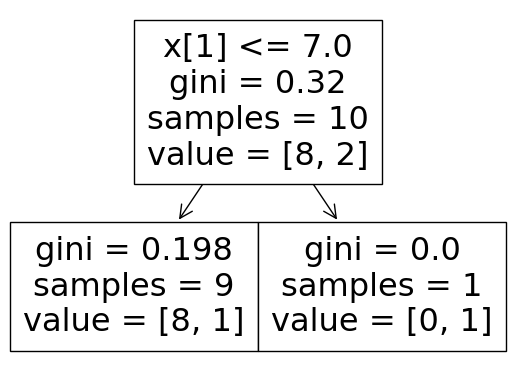

In [65]:
plot_tree(dt3)

<Axes: >

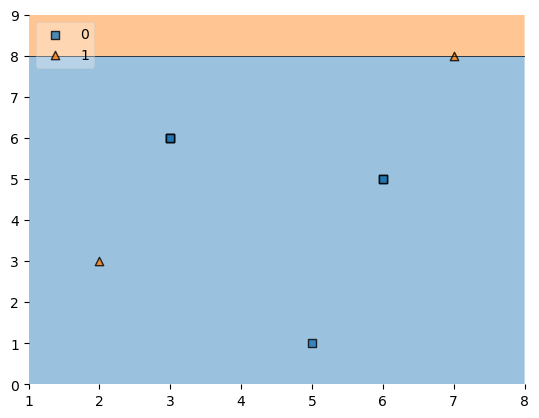

In [66]:
plot_decision_regions(X, y, clf=dt3, legend=2)

## One missing points in the region.

In [67]:
third_data['y_pred'] = dt3.predict(X)

In [68]:
third_data

,X1,X2,label,weight,y_pred
7,7,8,1,0.1,0
6,6,5,0,0.1,1
6,6,5,0,0.1,0
1,2,3,1,0.1,0
6,6,5,0,0.1,0
6,6,5,0,0.1,0
6,6,5,0,0.1,0
6,6,5,0,0.1,0
6,6,5,0,0.1,0
6,6,5,0,0.1,0


In [69]:
alpha3 = calculate_model_weight(0.3)
alpha3

0.42364893019360184

## Printing all the values of alpha's

In [70]:

print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 0.42364893019360184


## Ready for prediction.

In [71]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [72]:
dt2.predict(query)

array([1], dtype=int64)

In [73]:
dt3.predict(query)

array([0], dtype=int64)

In [75]:
alpha1*1 +alpha2*1 + alpha3*(-1)

1.09861228866811

In [76]:
np.sign(1.09861228866811)

1.0

In [77]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [78]:
dt2.predict(query)

array([0], dtype=int64)

In [79]:
dt3.predict(query)

array([1], dtype=int64)

In [80]:
alpha1*1 + alpha2*(-1)+alpha3*1

-0.2513144282809061

In [81]:
np.sign(-0.2513144282809061)

-1.0

## thats it how it looks AdaBoosting.

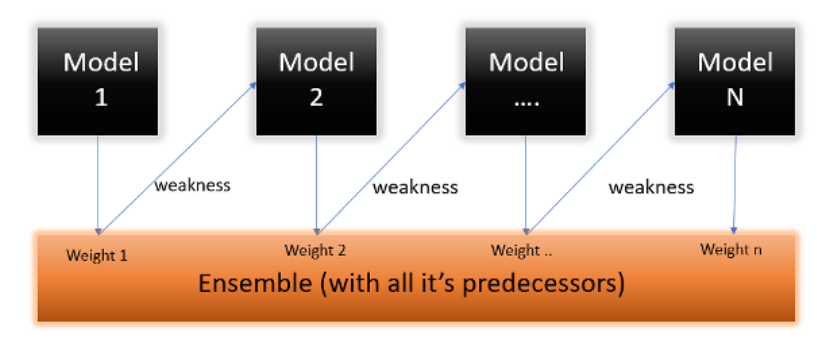

In [82]:
from IPython.display import Image
display(Image(filename='adaboost.png'))

link1 = www.github.com/Ayushparwal
link2 = www.kaggle.com/ayushparwal2026